## Imágenes de Google Maps

Los modelos de Deep Learning (DL) requieren una gran cantidad de datos para entrenamiento. Una alternativa para aumentar el tamaño del conjunto de entrenamiento podría estar en extraer imágenes de pavimentos utilizando la API estática Street View de google.  

### API Streer View de google 

La API estática de Street View permite acceder a una panorámica o miniatura estática (no interactiva). La petición se define con parámetros URL enviados a través de una solicitud HTTP estándar y retorna una imagen estática.

Una solicitud de imagen de Street View es una URL HTTP de la siguiente forma:
>https://maps.googleapis.com/maps/api/streetview?parameters 
    
#### Parámetros
Algunos de los parámetros permitidos y sus posibles valores se listan a continuación:

*Heading:* Indica la dirección de la brújula de la cámara. Los valores aceptados son de 0 a 360 (0 y 360-->Norte.  90-->Este. 180-->sur. 270-->Oeste). Si no se especifica ningún rumbo, se calculará un valor que dirige la cámara hacia la localización especificada, desde el punto en el que se tomó la fotografía más cercana. 

*Fov:* (el valor predeterminado es 90 ) determina el campo de visión horizontal de la imagen. El campo de visión se expresa en grados, con un valor máximo permitido de 120. Cuando se trata de una ventana gráfica de tamaño fijo, como con una imagen de Street View de un tamaño establecido, el campo de visión en esencia representa el zoom, con números más pequeños que indican un mayor nivel de zoom.|

*Pitch:* (el valor predeterminado es 0 ) especifica el ángulo hacia arriba o hacia abajo de la cámara en relación con el vehículo de Street View. Esto es a menudo, pero no siempre, horizontal plano. Los valores positivos inclinan la cámara hacia arriba (90 grados--> hacia arriba); los valores negativos inclinan la cámara hacia abajo (-90--> hacia abajo).

*Location:* puede ser una cadena de texto (como Chagrin Falls, OH) o un valor Lat/Lng ( 40.457375,-80.009353). La API estática de Street View se ajustará al panorama fotografiado más cercano a esta ubicación. Cuando se proporciona una cadena de texto de dirección, la API puede usar una ubicación de cámara diferente para mostrar mejor la ubicación especificada. Cuando se proporciona un lat / lng, la API busca en un radio de 50 metros una fotografía más cercana a esta ubicación. Debido a que las imágenes de Street View se actualizan periódicamente, y las fotografías pueden tomarse desde posiciones ligeramente diferentes cada vez, es posible que location se ajuste a un panorama diferente cuando se actualizan las imágenes.

*Size:* Especifica el tamaño de salida de la imagen en píxeles. El tamaño se especifica como {width}x{height}, por ejemplo size=600x400 devuelve una imagen de 600 píxeles de ancho y 400 de alto.

>*Nota:*
*Necesita una clave [API](https://developers.google.com/maps/documentation/streetview/get-api-key) y debe habilitar la [facturación](https://developers.google.com/maps/documentation/streetview/usage-and-billing) en su proyecto.*

[Más información de la API](https://developers.google.com/maps/documentation/streetview/intro?hl=en)


### Funciones
Usamos python para desarrollar las funciones que permiten descargar las imágenes.

Es necesario importar las siguientes librerias:

In [1]:
import urllib, os, json
import matplotlib.pyplot as plt
import cv2
import numpy as np

#### Función para descargar una imagen de StreetView 

Para descargar solo una imagen se definió la función *UnaImagenStreetview*. A esta función se le envían los siguientes parámetros:
   
    Latitud: latitud de la ubicación de la imagen. 
    Longitud: longitud de la ubicación de la imagen. 
    heading: dirección de la brújula de la cámara.
    pitch: ángulo de la cámara. 
    fov: campo de visión (zoom). 
    size: anchoxalto. 
    key= Su clave de google para la API street view.
    nombre: nombre con el cual se va a guardar la imagen.
    rutaGuardar: ruta del directorio destino donde se va a guardar la imagen.
 
El código en python seria así:

In [2]:
def UnaImagenStreetview(Latitud,Longitud,heading,pitch,fov,ancho,alto,key,nombre,rutaGuardar):
  base = "https://maps.googleapis.com/maps/api/streetview"
  nombreFigura = nombre+".jpg"
  MyUrl = base+"?size="+str(ancho)+"x"+str(alto)+"&fov="+str(fov)+"&pitch="+str(pitch)+"&location="+str(Latitud) + "," + str(Longitud) + "&heading=" + str(heading) +'&key='+key
  urllib.request.urlretrieve(MyUrl, os.path.join(rutaGuardar,nombreFigura)) #Copia un objeto de red denotado por una URL en un archivo local
  #Esta parte del codigo es para graficar:
  plt.figure(figsize=(15,15))
  img = cv2.imread(rutaGuardar+'/'+nombreFigura)  
  plt.imshow(img)
  plt.axis('off')
  return  

Para ilustrar el uso de esta función, vamos a descargar una imagen de la calle ubicada frente a la Universidad del Valle  *(Latitud=3.3758379, Longitud=-76.5372009)*, con la cámara en dirección al norte *(heading=0)*, una inclinación de 35 grados mirando hacia abajo *(pitch=-35)*, con el mínimo valor de zoom *(fov=120)*, el tamaño de la imagen será de *600x300*, la imagen se va a guardar en el directorio local : */home/ximena/tesis/StreetView/datos* con el nombre de: *Imagen*.

La llamada a la función seria así:

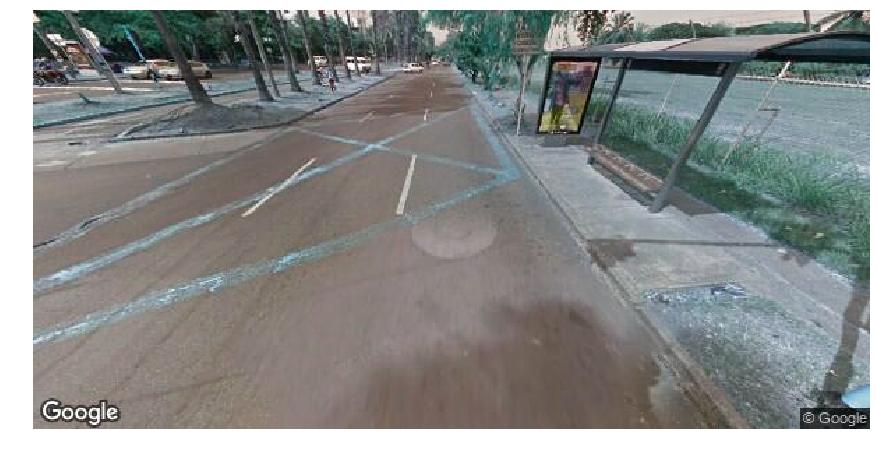

In [3]:
UnaImagenStreetview(Latitud=3.3758379,Longitud=-76.5372009,  #Latitud=4.4500788, Longitud=-75.8045666,
                  heading=0,
                  pitch=-35,
                  fov=120,
                  ancho=600,alto=300,
                  key='ColoqueSuClave',
                  nombre='Imagen',
                  rutaGuardar='/home/ximena/tesis/StreetView/datos') #Cambie por su ruta 

#### Función para descargar varias ubicaciones de StreetView 

Para descargar varias imagenes enviando un arreglo con varias ubicaciones, se definió la función *VariasUbicacionesStreetview*. A esta función se le envían los siguientes parámetros:
   
    ubicaciones: una matriz con información de latitud y longitud de las imágenes.
    heading: dirección de la brújula de la cámara.
    pitch: ángulo de la cámara. 
    fov: campo de visión (zoom). 
    size: anchoxalto. 
    key= Su clave de google para la API street view.
    nombre: nombre con el cual se van a guardar las imagenes.
    rutaGuardar: ruta del directorio destino donde se van a guardar las imagenes.
 
El código en python seria así:

In [6]:
def VariasUbicacionesStreetview(ubicaciones,heading,pitch,fov,ancho,alto,key,nombre,rutaGuardar):
  base = "https://maps.googleapis.com/maps/api/streetview"
  N=len(ubicaciones)
  for i in range(N):
    nombreFigura = nombre+str(i)+".jpg"
    MyUrl = base+"?size="+str(ancho)+"x"+str(alto)+"&fov="+str(fov)+"&pitch="+str(pitch)+"&location="+str(ubicaciones[i][0]) + "," + str(ubicaciones[i][1]) + "&heading=" + str(heading) +'&key='+key
    urllib.request.urlretrieve(MyUrl, os.path.join(rutaGuardar,nombreFigura)) #Copia un objeto de red denotado por una URL en un archivo local
  #Esta parte del codigo es para graficar:
  plt.figure(figsize=(20,10))
  for i in range(N):
      img = cv2.imread(rutaGuardar+'/'+nombre+str(i)+".jpg")  
      ax = plt.subplot(np.ceil(np.sqrt(N)),np.ceil(np.sqrt(N)),i+1)
      plt.imshow(img)
      plt.axis('off')
  
  return  

Para ilustrar el uso de esta función, vamos a descargar nueve imágenes contiguas de la calle ubicada frente a la Universidad del Valle, con la cámara en dirección al norte *(heading=0)*, una inclinación de 35 grados mirando hacia abajo *(pitch=-35)*, con el mínimo valor de zoom *(fov=120)*, el tamaño de la imagen será de *600x300*, la imagen se va a guardar en el directorio local : */home/ximena/tesis/StreetView/datos* con el nombre de: *Imagen1, Imagen2, ...*.

El código en python seria así:

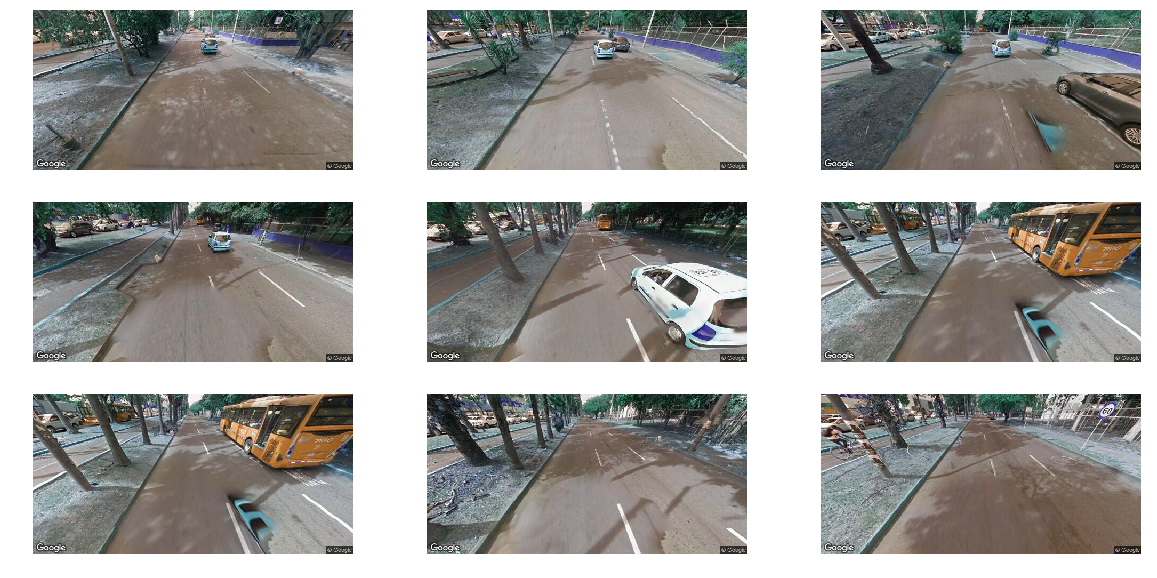

In [7]:
ubicaciones= [(3.372525,-76.537054),
(3.372803,-76.537140),
(3.373060,-76.537097),
(3.373424,-76.537140),
(3.373681,-76.537097),
(3.373896,-76.537162),
(3.373917,-76.537140),
(3.374217,-76.537162),
(3.374517,-76.537162)]

VariasUbicacionesStreetview(ubicaciones,  
                  heading=0,
                  pitch=-35,
                  fov=120,
                  ancho=600,alto=300,
                  key='ColoqueSuClave',
                  nombre='Imagen',
                  rutaGuardar='/home/ximena/tesis/StreetView/datos') #Cambie por su ruta 

#### Función para descargar una secuencia StreetView 

Para descargar una secuencia de N imagenes, se definió la función *SecuenciaStreetview*. A esta función se le envían los siguientes parámetros:
   
    Latitud,Longitud: Latitud y Longitud del punto de incio de la secuencia.
    heading: dirección de la brújula de la cámara.
    pitch: ángulo de la cámara. 
    fov: campo de visión (zoom). 
    size: anchoxalto. 
    key= Su clave de google para la api street view.
    nombre: nombre con el cual se van a guardar las imagenes.
    rutaGuardar: ruta del directorio destino donde se van a guardar las imagenes.
    N: cantidad de imagenes que desea obtener.
 
El código en python hasta el momento va así:

In [8]:
def SecuenciaStreetview(Latitud,Longitud,heading,pitch,fov,ancho,alto,key,nombre,rutaGuardar,N):
  base = "https://maps.googleapis.com/maps/api/streetview"
  for i in range(N):
    nombreFigura = nombre+str(i)+".jpg"
    MyUrl = base+"?size="+str(ancho)+"x"+str(alto)+"&fov="+str(fov)+"&pitch="+str(pitch)+"&location="+str(Latitud+i*0.001) + "," + str(Longitud+i*0.001) + "&heading=" + str(heading) +'&key='+key
    urllib.request.urlretrieve(MyUrl, os.path.join(rutaGuardar,nombreFigura)) #Copia un objeto de red denotado por una URL en un archivo local
  #Esta parte del codigo es para graficar:
  plt.figure(figsize=(15,10))
  for i in range(N):
      img = cv2.imread(rutaGuardar+'/'+nombre+str(i)+".jpg")  
      ax = plt.subplot(np.ceil(np.sqrt(N)),np.ceil(np.sqrt(N)),i+1)
      plt.imshow(img)
      plt.axis('off')
  
  return  

Para ilustrar el uso de esta función, intentamos descargar cuatro imágenes inciando en la ubicacion: Latitud=3.3758379, Longitud=-76.5372009, los otros parametros los dejamos igual que en los ejemplos anteriores.

Deberia descargar N imagenes contiguas a partir del punto de incio, pero **NO funciona**, porque el incremento en la latitud y la longitud no son lineales como se plantea en la funcion definida. Se necesita realizar un algoritmo que genere un valor valido para el incremento de la latitud y la longitud.

La llamada a la funcion seria así:

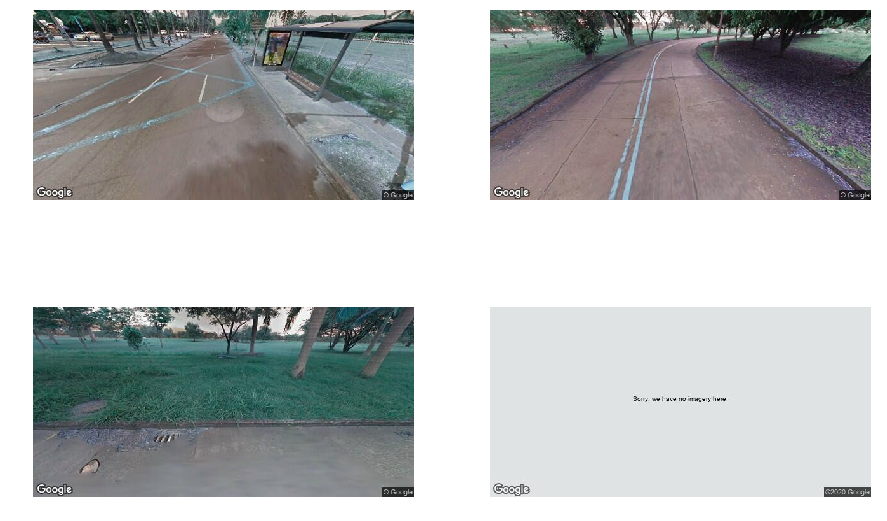

In [9]:
SecuenciaStreetview(Latitud=3.3758379,Longitud=-76.5372009,  
                  heading=0,
                  pitch=-35,
                  fov=120,
                  ancho=600,alto=300,
                  key='ColoqueSuClave',
                  nombre='Imagen',
                  rutaGuardar='/home/ximena/tesis/StreetView/datos',
                  N=4)